In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv("../assets/normalized_pyramid_data.csv"))

In [5]:
kings = df[df['royal_status'] == 'King']

In [6]:
# Not sure of the point of this; Brought over from visualizations

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()
reign_df = df[start_reign & end_reign]

In [8]:
# Find the number of queen pyramids at each complex

queens = df[df['royal_status'] == 'Queen']
queens[['royal_status', 'pyramid_complex']].groupby('pyramid_complex').count()

,royal_status
pyramid_complex,
Djedkare,1
Khentkaus I,1
Khufu,3
Menkaure,3
Neferirkare,1
Niuserre,1
Pepy I,11
Pepy II,3
Teti,3


In [10]:
# Compare the number of king and queen pyramids at each confirmed complex

key = ['unknown', 'pyramid?']
complexes = df[~df['pyramid_complex'].isin(key)]

kings_and_queens = complexes.groupby('pyramid_complex')['royal_status'].value_counts().unstack()
kings_and_queens

royal_status,King,Queen
pyramid_complex,,
Djedefre,1.0,NaN
Djedkare,1.0,1.0
Djoser,1.0,NaN
Ibi,1.0,NaN
Khaba,1.0,NaN
Khafre,1.0,NaN
Khentkaus I,NaN,1.0
Khufu,1.0,3.0
Menkauhor,1.0,NaN


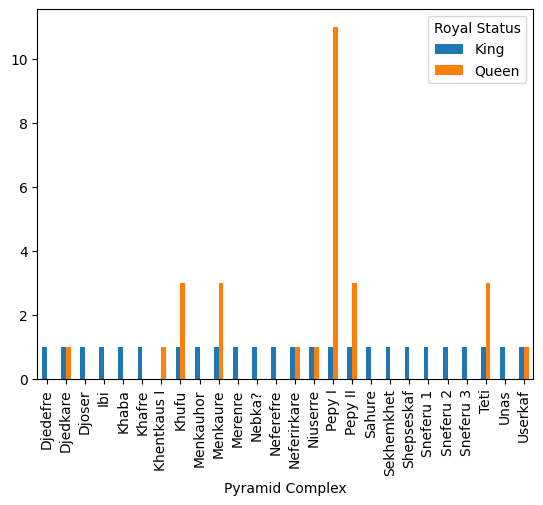

In [11]:
plt = kings_and_queens.plot.bar(xlabel='Pyramid Complex')
plt.legend(title='Royal Status')

In [12]:
# Count all known casing types

df[df['casing'] != 'Unknown']['casing'].value_counts()

casing
Limestone             40
Limestone, Granite     6
Not Cased              2
Name: count, dtype: int64

In [13]:
# See the types of casing during each dyansty

dynasty_casing = df.groupby('dynasty')['casing'].value_counts().unstack()
dynasty_casing

casing,Limestone,"Limestone, Granite",Not Cased,Unknown
dynasty,,,,
3.0,2.0,NaN,NaN,2.0
4.0,7.0,6.0,2.0,NaN
5.0,12.0,NaN,NaN,NaN
6.0,18.0,NaN,NaN,7.0
7.0,NaN,NaN,NaN,9.0
8.0,1.0,NaN,NaN,5.0
